In [1]:
import pandas as pd
import nltk
import seaborn as sns
import os
import matplotlib.pyplot as plt
import json
import re
import numpy as np
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rowjak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rowjak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
path = os.getcwd()

In [3]:
df_used = pd.read_parquet(os.path.join(path, "dataset/used/train.parquet"))

In [5]:
df_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193883 entries, 0 to 193882
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   id                            193883 non-null  int64 
 1   url                           193883 non-null  object
 2   clean_article                 193883 non-null  object
 3   clean_summary                 193883 non-null  object
 4   extractive_summary            193883 non-null  object
 5   ext_clean_article             193883 non-null  object
 6   ext_clean_summary             193883 non-null  object
 7   extractive_summary_sentences  193883 non-null  object
 8   ext_extractive_summary        193883 non-null  object
 9   prep_clean_article            193883 non-null  object
 10  prep_clean_summary            193883 non-null  object
 11  prep_extractive_summary       193883 non-null  object
 12  prep_clean_article_no_sw      193883 non-null  object
dtyp

In [6]:
random_sample = df_used.sample(n=10, random_state=1)  # random_state untuk konsistensi hasil
for index, row in random_sample.iterrows():
    print(f"1. Index: {index}")
    print(f"2. Url:\n {row['url']}")
    
    print(f"3.1. Clean Article:\n {row['ext_clean_article']}")
    print(f"3.2. Prep Clean Article:\n {row['prep_clean_article']}")
    print(f"3.3. Prep Clean Article No Stopwords:\n {row['prep_clean_article_no_sw']}")
    
    print(f"4.1. Clean Summary:\n {row['ext_clean_summary']}")
    print(f"4.2. Prep Clean Summary:\n {row['prep_clean_summary']}")
    
    print(f"5.1. Extractive Summary:\n {row['ext_extractive_summary']}")
    print(f"5.2. Prep Extractive Summary:\n {row['prep_extractive_summary']}")
    print("-" * 100)  # Pembatas antar tweet

1. Index: 130774
2. Url:
 https://www.liputan6.com/news/read/276057/ledakan-tabung-gas-lima-warga-luka-luka
3.1. Clean Article:
 Liputan6.com, Bekasi: Lima orang mengalami luka bakar serius di sekujur tubuh akibat edakan tabung gas di Kampung Kebalen, Kabupaten Bekasi, Jawa Barat, Sabtu(8/5). Kepala Kepolisian Sektor(Kapolsek) Babelan, AKP H. Rosid, mengatakan, lokasi ledakan diduga dijadikan sebagai tempat usaha gas ilegal milik warga bernama Marzuki. Lokasi tersebut dijadikan tempat usaha pengisian gas korek api. " Ratusan tabung gas masing-masing berukuran 50 kilogram dan 10 miligram meledak sekitar pukul 09: 00 WIB. Untuk tabung gas besar yang meledak berjumlah puluhan, sementara gas ukuran kecil yang meledak mencapai ratusan. Hingga kini masih kami lakukan upaya pendataan jumlah pastinya, " ujar kapolsek. Akibat peristiwa itu sebanyak lima karyawan masing-masing bernama Jhokan(41), Apit(41), Acep(50), Udin(25), dan Ero(24) mengalami luka bakar 90 persen di sekujur tubuh dan dilari

In [7]:
def get_ngrams(text, n):
    ngrams_list = []
    for line in text:
        tokens = nltk.word_tokenize(line)
        ngrams_list.extend([' '.join(gram) for gram in nltk.ngrams(tokens, n)])
    return ngrams_list

def get_most_common_ngrams(ngrams, jumlah_rank):
    words_count = Counter(ngrams)
    most_common_words = words_count.most_common(jumlah_rank)
    most_common_df = pd.DataFrame(most_common_words, columns=['ngram', 'count'])
    total_words = sum(words_count.values())
    most_common_df['percentage'] = (most_common_df['count'] / total_words) * 100
    return most_common_df

def plot_most_common_ngrams(most_common_df, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='ngram', data=most_common_df, palette='viridis', hue='ngram', dodge=False)
    
    for i in range(len(most_common_df)):
        count = most_common_df['count'][i]
        plt.text(count, i, f'{count}', color='black', va='center')

    plt.title(title)
    plt.xlabel('Frekuensi')
    plt.ylabel('N-gram')
    plt.legend([],[], frameon=False)  # Menghilangkan legenda
    plt.show()

In [8]:
from collections import Counter
# Mengambil artikel yang telah diproses
text = list(df_used['prep_clean_article_no_sw'])
jumlah_rank = 10

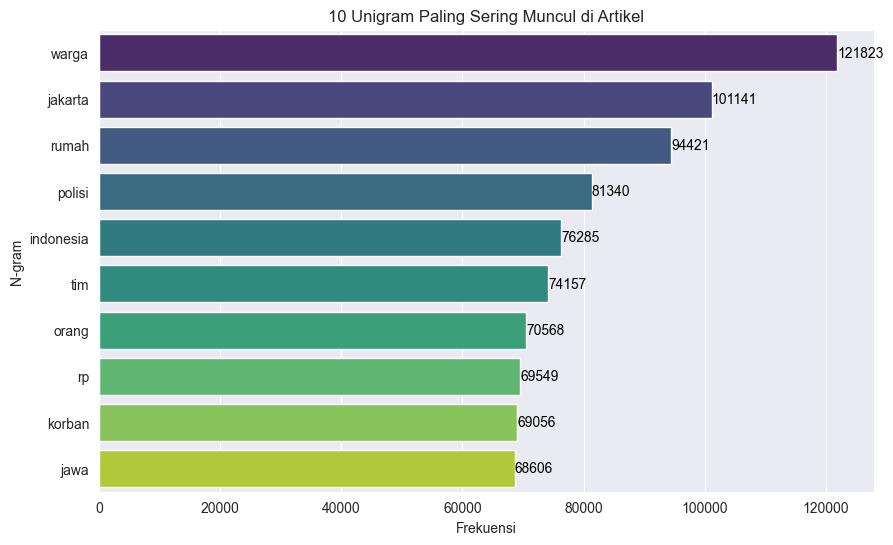

In [9]:
unigrams = get_ngrams(text, 1)
most_common_unigrams = get_most_common_ngrams(unigrams, jumlah_rank)
plot_most_common_ngrams(most_common_unigrams, f'{jumlah_rank} Unigram Paling Sering Muncul di Artikel')

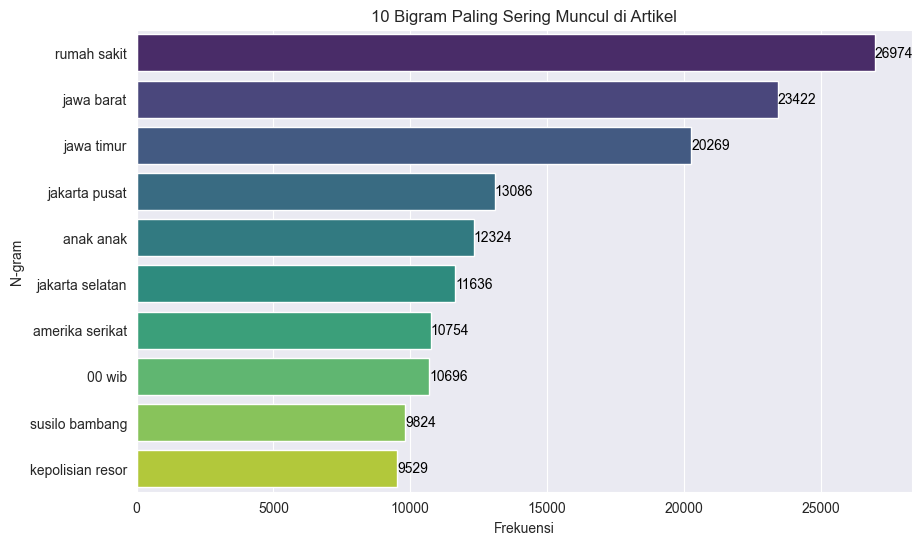

In [10]:
bigrams = get_ngrams(text, 2)
most_common_bigrams = get_most_common_ngrams(bigrams, jumlah_rank)
plot_most_common_ngrams(most_common_bigrams, f'{jumlah_rank} Bigram Paling Sering Muncul di Artikel')

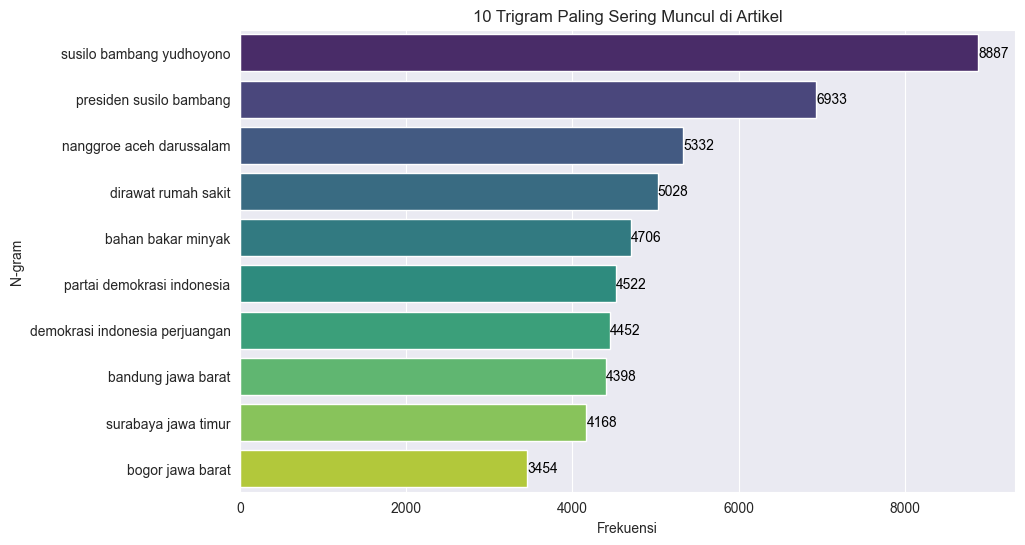

In [11]:
trigrams = get_ngrams(text, 3)
most_common_trigrams = get_most_common_ngrams(trigrams, jumlah_rank)
plot_most_common_ngrams(most_common_trigrams, f'{jumlah_rank} Trigram Paling Sering Muncul di Artikel')